# Project Description

### Research on car sales ads

We are working as analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on site every day.

### Description of the data
The dataset contains the following fields:
- price
- model_year
- model
- condition
- cylinders
- fuel — gas, diesel, etc.
- odometer — the vehicle's mileage when the ad was published
- transmission
- paint_color
- is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
- date_posted — the date the ad was published
- days_listed — from publication to removal 

# Project Goal
We need to study data collected over the last few years and determine which factors influence the price of a vehicle.

# Project Contents

-  <a href='#the_destination1'>Open the data file and study the general information:</a>
-  <a href='#the_destination2'>Preprocess the data:</a>
-  <a href='#the_destination3'>Make calculations and add them to the table:</a>
-  <a href='#the_destination4'>Carry out exploratory data analysis:</a>
-  <a href='#the_destination4'>Overall conclusion:</a>

<a id='the_destination1'></a>
# Step 1. Open the data file and study the general information. 

**Importing the libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

**Information for the "vehicles" dataset:**

In [2]:
try:
    vehicles = pd.read_csv('vehicles_us.csv')
except:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv')
vehicles.info()
display(vehicles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


There are 51525 rows and 13 columns in the vehicles_us data. Column names are "price", "model_year", "model", "condition", "cylinders", "fuel", "odometer", "transmission", "type", "paint_color", "is_4wd", "date_posted", "days_listed".

<a id='the_destination2'></a>
# Step 2. Preprocess the data

In [3]:
vehicles.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In "model_year", "cylinders", "odometer", "paint_color" and "is_4wd" columns there are 3614, 5260, 7892, 9267 and 25953 missing values respectively.

**Filling missing values with "0" in the "is_4wd" column:**

In [4]:
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(value = 0)
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In the "is_4wd" column there are 25953 missing values. I filled with 0 because if a Boolean field contains only True values, it's reasonable to assume that the missing values are False. That's why I filled with 0.

**Filling missing values in the "model_year", "cylinders", "odometers", "price" and "paint_color" column:**

In [5]:
vehicles["model_year"]  = vehicles.groupby(['model'])['model_year'].transform(lambda x: x.fillna(np.round(x.median())))
vehicles['cylinders']  = vehicles.groupby(['model','model_year'])['cylinders'].transform(lambda x: x.fillna(np.round(x.mean())))
vehicles['odometer']  = vehicles.groupby(['model_year','condition'])['odometer'].transform(lambda x: x.fillna(x.mean()))
vehicles = vehicles[vehicles.cylinders.notna()]
vehicles = vehicles[vehicles.odometer.notna()]
vehicles['price']  = vehicles.groupby(['model','condition', 'odometer'])['price'].transform(lambda x: x.fillna(x.mean()))
vehicles['paint_color'] = vehicles['paint_color'].fillna("Not mentioned")
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,Not mentioned,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,Not mentioned,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28


-  For filling missing values in the "model_year" column, I applied groupby method in the "model" column and then transforming those values by taking median method . Finally, I took the rounded value because "model_year" can not be fractional value.
-  For filling missing values in the "cylinders" column, I applied groupby method in the "model", "model_year" column and then transforming those values by taking mean method . Finally, I took the rounded value because number of cylinders can not be fractional value. 
-  For filling missing values in the "odometer" column, I applied groupby method in the "model_year" & "condition" column and then transforming those values by taking mean method .
-  For filling missing values in the "price" column, I applied groupby method in the "model", "condition" & "odometer" column and then transforming those values by taking mean method . 
-  For filling values in the "paint_color" column I filled with "Not mentioned".

**Checking duplicate values in the "vehicles" dataset:**

In [6]:
 vehicles.duplicated().sum()

0

There is no duplicate values in the "vehicles" dataset.

-  In "model_year", "cylinders", "odometer", "paint_color" and "is_4wd" columns there are 3614, 5260, 7892, 9267 and 25953 missing values respectively.
-  In the "is_4wd" column there are 25953 missing values. I filled with 0 because if a Boolean field contains only True values, it's reasonable to assume that the missing values are False. That's why I filled with 0.
-  For filling missing values in the "model_year" column, I applied groupby method in the "model" column and then transforming those values by taking median method . Finally, I took the rounded value because "model_year" can not be fractional value.
-  For filling missing values in the "cylinders" column, I applied groupby method in the "model", "model_year" column and then transforming those values by taking mean method . Finally, I took the rounded value because number of cylinders can not be fractional value. 
-  For filling missing values in the "odometer" column, I applied groupby method in the "model_year" & "condition" column and then transforming those values by taking mean method .
-  For filling missing values in the "price" column, I applied groupby method in the "model", "condition" & "odometer" column and then transforming those values by taking mean method . 
-  For filling values in the "paint_color" column I filled with "Not mentioned".
-  There is no duplicate values in the "vehicles" dataset.

<a id='the_destination3'></a>
# Step 3. Make calculations and add them to the table

**Splitting the "date_posted" column into "day", "month", "year" column:**

In [7]:
vehicles["date_posted"] = pd.DatetimeIndex(vehicles['date_posted'])
vehicles['day'] = vehicles['date_posted'].apply(lambda x : x.day)
vehicles['month'] = vehicles['date_posted'].apply(lambda x : x.month)
vehicles['year'] = vehicles['date_posted'].apply(lambda x : x.year)
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,Not mentioned,1.0,2018-06-23,19,23,6,2018
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,Not mentioned,0.0,2019-03-22,9,22,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019


In the "date_posted " column the data type is string. I created new column named day, month , year. Those new columns data types are integer.

**Calculating each vehicle age:**

In [8]:
vehicles['vehicles_age'] = vehicles['year'] - vehicles['model_year'] + 1
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicles_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,Not mentioned,1.0,2018-06-23,19,23,6,2018,8.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,7.0
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,Not mentioned,0.0,2019-03-22,9,22,3,2019,17.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,3.0


For finding "vehicle_age" I substracted "model_year" column from "year" column. Finally I add plus 1 because "vehicles_age" should be at least one. 

**Calculating "average_mileage_per_year" for each vehicle:**

In [9]:
vehicles['average_mileage_per_year'] = vehicles['odometer'] / vehicles['vehicles_age']
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicles_age,average_mileage_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,Not mentioned,1.0,2018-06-23,19,23,6,2018,8.0,18125.000000
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,8.0,11088.125000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,7.0,15714.285714
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,Not mentioned,0.0,2019-03-22,9,22,3,2019,17.0,11918.932598
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,3.0,26967.666667


For finding average_mileage_per_year I divided "odometer" column by "vehicles_age" column.

**Converting "average_mileage_per_year" column from fractional number to integer number:**

In [10]:
vehicles['average_mileage_per_year'] = vehicles['average_mileage_per_year'].round()
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicles_age,average_mileage_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,Not mentioned,1.0,2018-06-23,19,23,6,2018,8.0,18125.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,8.0,11088.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,7.0,15714.0
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,Not mentioned,0.0,2019-03-22,9,22,3,2019,17.0,11919.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,3.0,26968.0


In the "average_mileage_per_year" column gives us fractional value. I converted into integer value.

**In the condition column, replace string values with a numeric scale:**

In [11]:
dictionary = {'new':5 , 'like new':4, 'excellent':3, 'good' :2, 'fair':1, 'salvage':0}
vehicles['condition_new'] = vehicles.condition.replace(dictionary)
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicles_age,average_mileage_per_year,condition_new
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,Not mentioned,1.0,2018-06-23,19,23,6,2018,8.0,18125.0,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,8.0,11088.0,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,7.0,15714.0,4
3,1500,2003.0,ford f-150,fair,8.0,gas,202621.854167,automatic,pickup,Not mentioned,0.0,2019-03-22,9,22,3,2019,17.0,11919.0,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,3.0,26968.0,3


In the "condition" column, I replaced the string values with a numeric scale by creating dictionary:
dictionary = {'new':5 , 'like new':4, 'excellent':3, 'good' :2, 'fair':1, 'salvage':0}

-  In the "date_posted " column the data type is string. I created new column named day, month , year. Those new columns data types are integer.
-  For finding "vehicle_age" I substracted "model_year" column from "year" column. Finally I add plus 1 because "vehicles_age" should be at least one. 
-  For finding average_mileage_per_year I divided "odometer" column by "vehicles_age" column.
-  In the "average_mileage_per_year" column gives us fractional value. I converted into integer value.
-  In the "condition" column, I replaced the string values with a numeric scale by creating dictionary:dictionary = {'new':5 , 'like new':4, 'excellent':3, 'good' :2, 'fair':1, 'salvage':0}

<a id='the_destination4'></a>
# Step 4. Carry out exploratory data analysis

**Drawing histograms for "price", "cylinders", "vehicles_age", "days_listed", "average_mileage_per_year" column:**

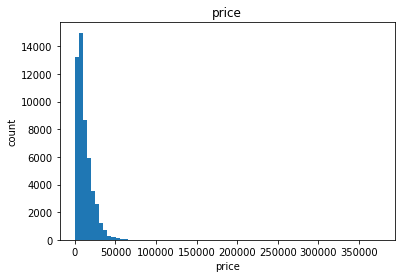

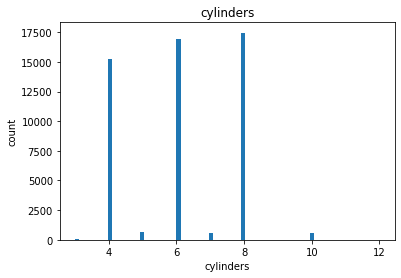

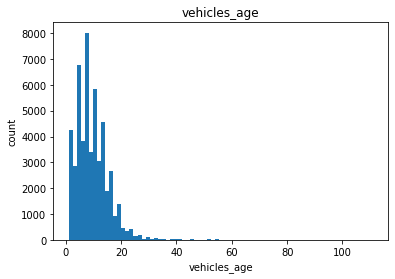

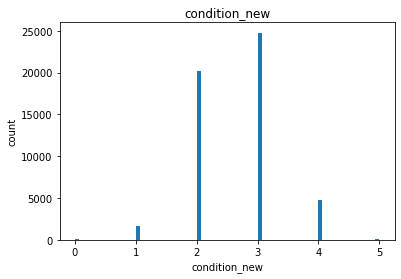

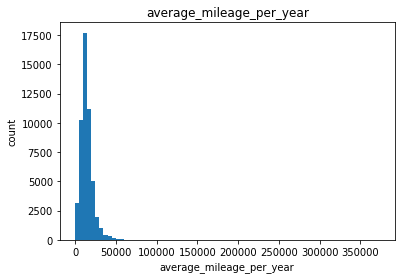

In [12]:
plt.hist(vehicles["price"], bins=75 )
plt.title('price')
plt.ylabel('count')
plt.xlabel('price');
plt.show()


plt.hist(vehicles["cylinders"], bins=75)
plt.title('cylinders')
plt.ylabel('count')
plt.xlabel('cylinders');
plt.show()


plt.hist(vehicles["vehicles_age"], bins=75)
plt.title('vehicles_age')
plt.ylabel('count')
plt.xlabel('vehicles_age');
plt.show()


plt.hist(vehicles["condition_new"], bins=75)
plt.title('condition_new')
plt.ylabel('count')
plt.xlabel('condition_new');
plt.show()


plt.hist(vehicles["average_mileage_per_year"], bins=75)
plt.title('average_mileage_per_year')
plt.ylabel('count')
plt.xlabel('average_mileage_per_year');
plt.show()

**Determining outlier for the "price" column:**

In [13]:
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit=Q1 - 1.5*IQR
Upper_limit=Q3 + 1.5*IQR
print("Upper_limit:" , Upper_limit.round())

Upper_limit: 34618.0


The upper limit price for the vehicle is 34618 dollars.

**Determining outlier for the "vehicles_age" column:**

In [14]:
Q1 = vehicles['vehicles_age'].quantile(0.25)
Q3 = vehicles['vehicles_age'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit=Q1 - 1.5*IQR
Upper_limit=Q3 + 1.5*IQR
print("upper_limit:" , Upper_limit.round())

upper_limit: 25.0


The maximum vehicle age is 25 years.

**Determining outlier for the "average_mileage_per_year" column:**

In [15]:
Q1 = vehicles['average_mileage_per_year'].quantile(0.25)
Q3 = vehicles['average_mileage_per_year'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit=Q1 - 1.5*IQR
Upper_limit=Q3 + 1.5*IQR
print("upper_limit:" , Upper_limit.round())

upper_limit: 29690.0


The upper limit for the average mileage per year is 29690 miles.

**Removing outliers from the "price", "cylinders", "condition_new", "vehicle_age" and "average_mileage_per_year" columns:**

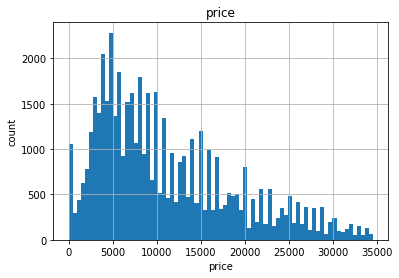

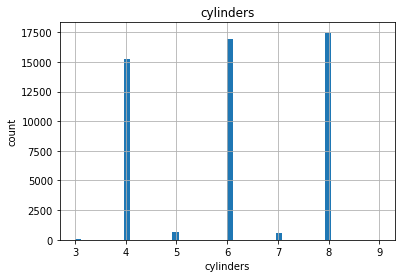

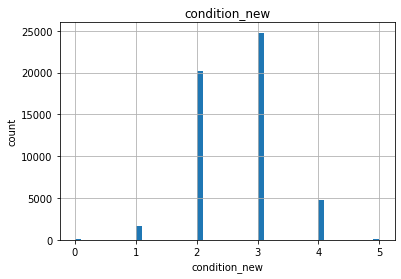

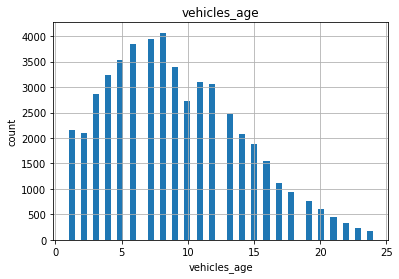

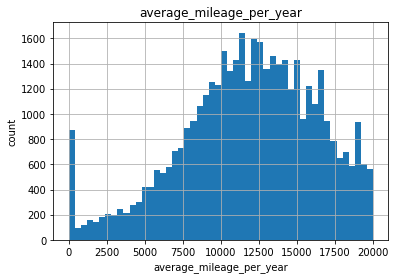

In [16]:
outliers_price = vehicles.query('price < 34618' )
outliers_price.hist("price", bins=75)
plt.ylabel('count')
plt.xlabel('price');
plt.show()

outliers_cylinders =  vehicles.query('cylinders >2 and cylinders <10')
outliers_cylinders.hist("cylinders", bins=50)
plt.ylabel('count')
plt.xlabel('cylinders')
plt.show()

outliers_condition_new = vehicles.query('condition_new <= 5')
outliers_condition_new.hist("condition_new", bins=50)
plt.ylabel('count')
plt.xlabel('condition_new')
plt.show()

outliers_vehicles_age =  vehicles.query('vehicles_age < 25')
outliers_vehicles_age.hist("vehicles_age", bins=50)
plt.ylabel('count')
plt.xlabel('vehicles_age')
plt.show()

outliers_average_mileage_per_year =  vehicles.query('average_mileage_per_year < 29690')
outliers_average_mileage_per_year.hist("average_mileage_per_year", bins=50, range=(0,20000))
plt.ylabel('count')
plt.xlabel('average_mileage_per_year')
plt.show()

**Comparison of histograms and conclusions:**
-  After finding the ouliers for the price of the vehicles, we can see that most of the vehicles's price is less than 34618.
-  Most of the vehicle's cylinder is 4, 6, 8. Very few vehicles have cylinders more than 10 and less than 4.
-  Majority of the vehicles_age is less than 25.
-  After removing the outliers of "average_mileage_per_year" column , I can see that "average_mileage_per_year" of the vehicles is less than 29690.
-  From the histogram we can see than most of the cars condition is good & excellent.

**Study of "days_listed" column:**

In [17]:
vehicles['days_listed'].describe()


count    51492.000000
mean        39.553445
std         28.201542
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Applying describe method, we can see that the average for the ads is 39.553445 and standard deviation is 28.201542.

**Histogram of "days_listed" column:**

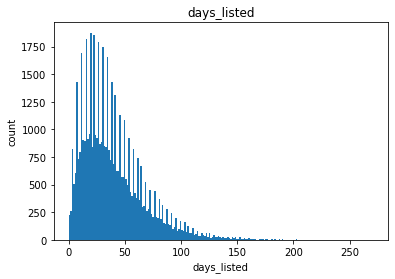

In [18]:
plt.hist(vehicles["days_listed"], bins=200)
plt.title('days_listed')
plt.ylabel('count')
plt.xlabel('days_listed');
plt.show()

**Determining of mean & median of "days_listed" column:**

In [19]:
print(vehicles['days_listed'].mean())
print(vehicles['days_listed'].median())

39.55344519537015
33.0


After analyzing the describe() method on "days_listed" column and observing the histogram carefully, we can say that typical lifetime of an ad is about 30 to 40 days.It can be said that typical lifetime is abnormally long if it is more than 120 days.Conversely, there were almost 25% ads which were removed with in 19 days.

**Analysing the number of ads for each type of vehicles:**

In [20]:
display(vehicles.groupby(['type'])['date_posted'].count().sort_values(ascending=True))
len(vehicles['date_posted'])

type
bus               24
offroad          214
other            255
convertible      444
van              632
hatchback       1047
mini-van        1161
wagon           1540
coupe           2297
pickup          6984
sedan          12147
truck          12347
SUV            12400
Name: date_posted, dtype: int64

51492

**Determining the greatest number of vehicles type:**

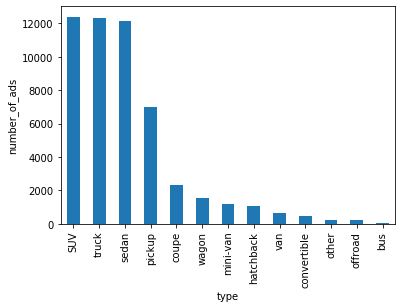

In [21]:
ads_vehicle = vehicles["type"].value_counts().sort_values(ascending = False).plot.bar()
ads_vehicle.set_xlabel("type")
ads_vehicle.set_ylabel("number_of_ads")
display(ads_vehicle)
len(vehicles['date_posted'])
plt.show()

From above, it can be said that the two types with the greatest number of ads are SUV and truck & their values are 12400, 12347 respectively.

**Analysing the price for each type of vehicles**

In [22]:
display(vehicles.groupby(['type'])['price'].mean().sort_values(ascending=True))

type
hatchback       6868.513849
sedan           6967.491479
mini-van        8193.177433
wagon           9064.879870
van            10554.452532
other          10962.223529
SUV            11151.171129
offroad        14292.294393
coupe          14331.161950
convertible    14587.484234
pickup         16050.362829
truck          16740.063011
bus            17135.666667
Name: price, dtype: float64

I tried to find out the average price for all types of vehicles.Among all of the types,"bus" type vehicle is more expensive compared to the other types. Average price for "pickup" and "truck" type vehicles are same.The more cheaper type of vehicles are "hatchback", "mini-van", "sedan" and "wagon".

**Scatter plotting for the type of "SUV":**

[Text(0.5, 1.0, 'condition_new for SUV')]

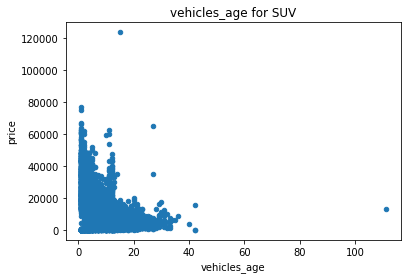

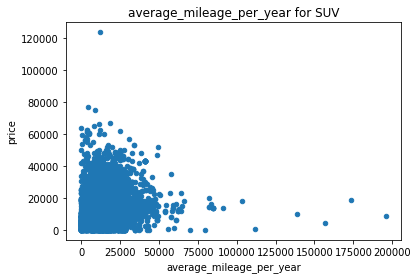

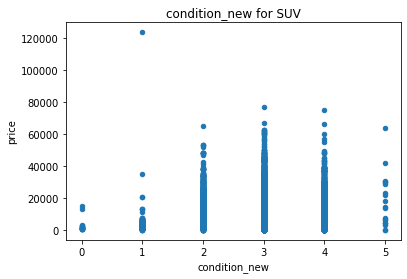

In [23]:
vehicles.query('type == "SUV"').plot.scatter("vehicles_age","price").set(title='vehicles_age for SUV')
vehicles.query('type == "SUV"').plot.scatter("average_mileage_per_year","price").set(title='average_mileage_per_year for SUV')
vehicles.query('type == "SUV"').plot.scatter("condition_new","price").set(title='condition_new for SUV')

**Scatter plotting for the type of "truck":**

[Text(0.5, 1.0, 'condition_new for truck')]

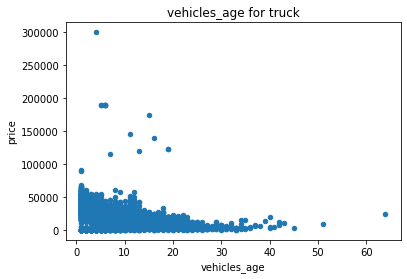

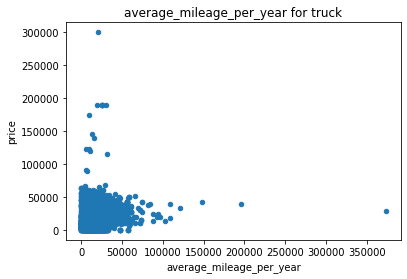

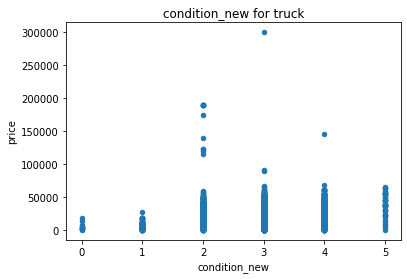

In [24]:
vehicles.query('type == "truck"').plot.scatter("vehicles_age","price").set(title='vehicles_age for truck')
vehicles.query('type == "truck"').plot.scatter("average_mileage_per_year","price").set(title='average_mileage_per_year for truck')
vehicles.query('type == "truck"').plot.scatter("condition_new","price").set(title='condition_new for truck')

**Catplot for the type of "SUV":**

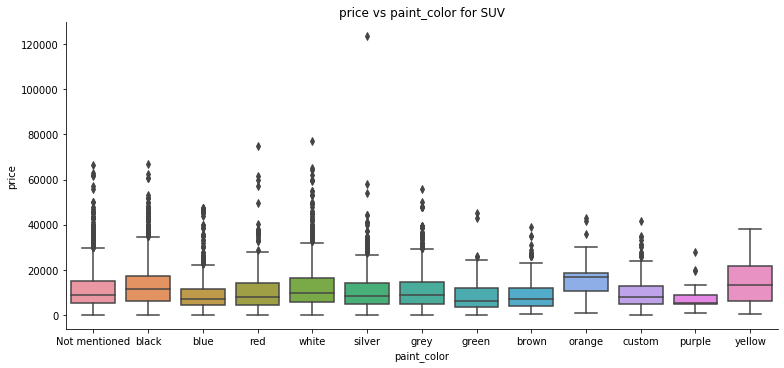

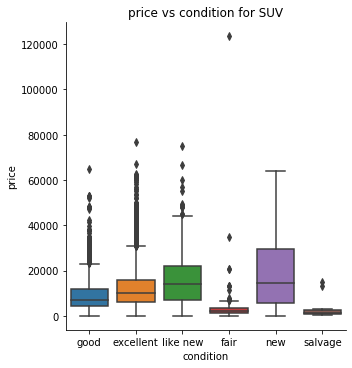

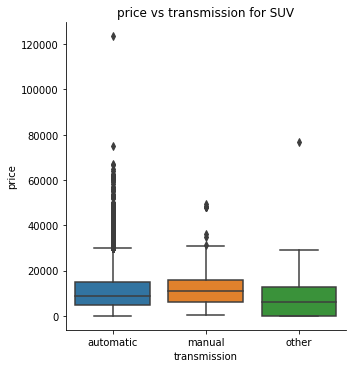

In [25]:
sns.catplot(x="paint_color", y="price", kind="box",height=5, aspect=11/5, data=vehicles.query('type == "SUV"')).set(title='price vs paint_color for SUV')
sns.catplot(x="condition", y="price", kind="box", data=vehicles.query('type == "SUV"')).set(title='price vs condition for SUV')
sns.catplot(x="transmission", y="price", kind="box",data=vehicles.query('type == "SUV"')).set(title='price vs transmission for SUV')

**Catplot for the type of "truck":**

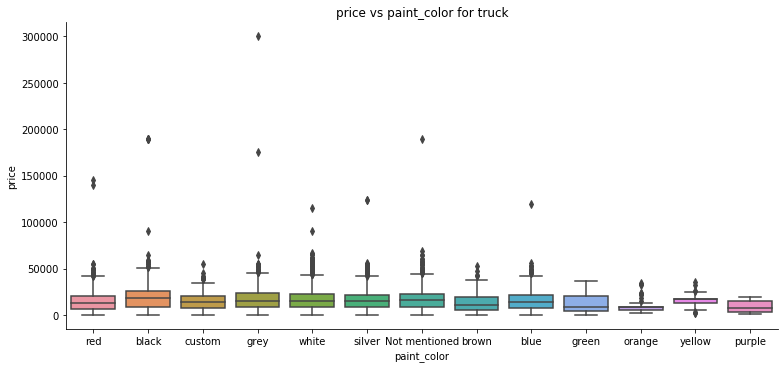

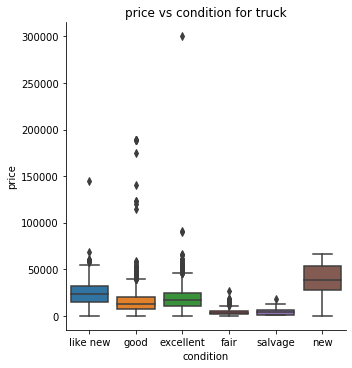

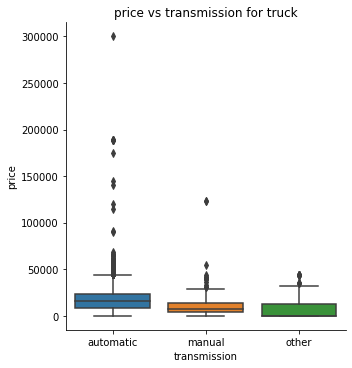

In [26]:
sns.catplot(x="paint_color", y="price", kind="box",height=5, aspect=11/5, data=vehicles.query('type == "truck"')).set(title='price vs paint_color for truck')
sns.catplot(x="condition", y="price", kind="box", data=vehicles.query('type == "truck"')).set(title='price vs condition for truck')
sns.catplot(x="transmission", y="price", kind="box",data=vehicles.query('type == "truck"')).set(title='price vs transmission for truck')

**Checking the "transmission" who has more than 50 ads:**

In [27]:
vehicles["transmission"].value_counts() > 50

automatic    True
manual       True
other        True
Name: transmission, dtype: bool

**Checking the "type" who has more than 50 ads:**

In [28]:
vehicles["type"].value_counts() > 50

SUV             True
truck           True
sedan           True
pickup          True
coupe           True
wagon           True
mini-van        True
hatchback       True
van             True
convertible     True
other           True
offroad         True
bus            False
Name: type, dtype: bool

According to the question, when analysing categorical variables the categories must have at least 50 ads. But the numebr of "bus" type vehicle is 24. So we have to analyse our vahicles_us data excluding bus type vehicles.

**Counting the number of vehicles type:**

In [29]:
vehicles["type"].value_counts()

SUV            12400
truck          12347
sedan          12147
pickup          6984
coupe           2297
wagon           1540
mini-van        1161
hatchback       1047
van              632
convertible      444
other            255
offroad          214
bus               24
Name: type, dtype: int64

**Checking the vehicles "paint_color" who has more than 50 ads:**

In [30]:
vehicles["paint_color"].value_counts() > 50

white            True
Not mentioned    True
black            True
silver           True
grey             True
blue             True
red              True
green            True
brown            True
custom           True
yellow           True
orange           True
purple           True
Name: paint_color, dtype: bool

<a id='the_destination5'></a>
# Step 5. Overall conclusion


-  We have to analyse our vehicles_us data excluding "bus" type vehicles.
-  Average price for "pickup" and "truck" type vehicles are almost same.The more cheaper type of vehicles are "hatchback", "mini-van", "sedan" and "wagon".
-  The two types with the greatest number of ads are bus and van(The average dependence of the number of ads on the vehicle type).
-  After removing the outliers, we found that the majority of the vehicles price is less than 34618.
-  Most of the vehicles average_age is less than 25 years.
-  Maximum number of vehicles have 4,6,8 cylinders. Very few vehicles have less than 4 & more than 8 cylinders.

Finally, I can conclude that the "price" of the vehicles are dependent on "model_year", "condition", "type", "average_mileage_per_year" and "odometer".If the vehicles "average_mileage_per_year" is less compared to others then it can be said that those vehicles are "new" or "likely_new" condition. In that case, the price of those vehicles would be higher.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [X]  files explored (first rows printed, info() method)
- [X]  missing values determined
- [X]  missing values filled in
- [X]  clarification of the discovered missing values provided
- [X]  data types converted
- [X]  explanation of which columns had the data types changed and why
- [X]  calculated and added to the table: day of the week, month, and year the ad was placed
- [X]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [X]  calculated and added to the table: the vehicle's average mileage per year
- [X]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [X]  histograms for each parameter created
- [X]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [X]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [X]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [X]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [X]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [X]  each stage has a conclusion
- [X]  overall conclusion drawn